# KDDM Group 17


## 0: Package and df Import 

Importing and load necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# For logistic regression
from sklearn.model_selection import train_test_split  # Split df into training set
from sklearn.linear_model import LogisticRegression # Using to predict category
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 1: Data Understanding

#### Set directory and load data

In [2]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('data_7.csv')

#### Overview and summary of the data

In [3]:
df.shape
#print(df.head())
#print(df.info())

# Summary Statistics
print(df.describe())

# Exportiert summary Tabelle
#summary_stats = df.describe()
#summary_stats.to_excel('summary_statistics.xlsx', index=True)


         Bedrooms   Bathrooms  SquareFootageHouse         Age  \
count  618.000000  630.000000          995.000000  868.000000   
mean     1.621359    1.658730          175.727638   43.324885   
std      0.941909    0.922796          821.254214   18.770587   
min      1.000000    1.000000         -895.000000  -94.000000   
25%      1.000000    1.000000           53.000000   33.000000   
50%      1.000000    1.000000           86.000000   45.000000   
75%      2.000000    2.000000          116.000000   57.000000   
max      5.000000    5.000000         8578.000000   71.000000   

       SquareFootageGarden  PreviousOwnerRating  HeatingCosts        Price  
count           995.000000           995.000000    516.000000   995.000000  
mean             11.538693             2.576905    125.134496   253.826843  
std               7.898836             0.894898    507.796163   428.592868  
min               6.000000             1.000000   -443.000000    29.123820  
25%               6.000000   

## 2: Data Preparation

#### How are the NA's distributed?

In [4]:
# Handling Missing Values
#print(df.isna().sum())

#Drop na (HeatingType), removes the 5 missing values across all values
df = df.dropna(how='all').copy()
#print(df.isna().sum())
#print(df.head())

#Remove all missing data
# !! Not for Pool
#df = df.dropna().copy()
missing_values_count = df.isna().sum()
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
Bedrooms               377
Bathrooms              365
SquareFootageHouse       0
Location               194
Age                    127
PoolQuality            643
HasPhotovoltaics        79
HeatingType              0
HasFiberglass            0
IsFurnished              0
DateSinceForSale         0
HouseColor               8
PreviousOwnerName      146
HasFireplace             0
KitchensQuality          0
BathroomsQuality         0
BedroomsQuality          0
LivingRoomsQuality       0
SquareFootageGarden      0
PreviousOwnerRating      0
HeatingCosts           479
WindowModelNames         0
Price                    0
dtype: int64


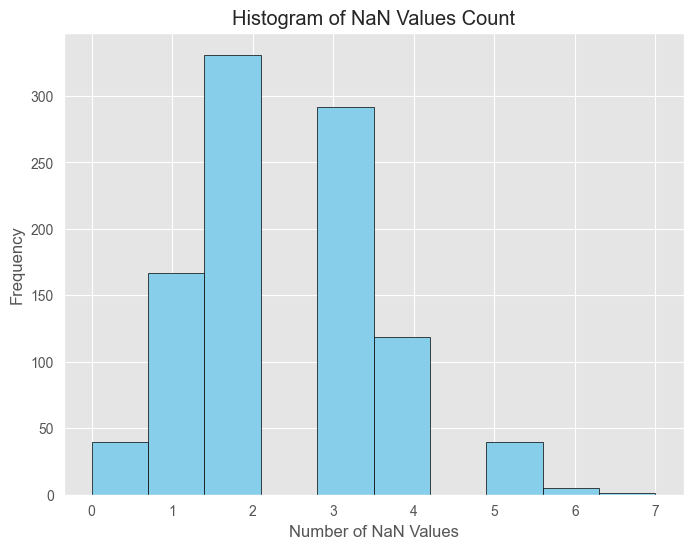

In [5]:

# Create column counting NA's
df['NaCount'] = df.isna().sum(axis=1)


# Plot a histogram for the 'NaCount' column
plt.figure(figsize=(8, 6))
plt.hist(df['NaCount'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of NaN Values')
plt.ylabel('Frequency')
plt.title('Histogram of NaN Values Count')
plt.grid(True)
plt.show()


In [6]:
df.shape

(995, 24)

#### Data type transformation

In [7]:
# Location
# There are 4 instead of 3 categories:
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
# The typo will be corrected and the data summarized
df['Location'].replace('Suburbann', 'Suburban', inplace=True)
pd.Categorical(df['Location'])

# Heating Type
# There are 5 instead of 3 categories:
# ['Electric', 'Electricity', 'Gas', 'Oil', 'Oil Heating'] 
# The data will be summarized
# ['Electric', 'Gas', 'Oil']
df['HeatingType'].replace('Electricity', 'Electric', inplace=True)
df['HeatingType'].replace('Oil Heating', 'Oil', inplace=True)
pd.Categorical(df['HeatingType'])

C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1200717693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].replace('Suburbann', 'Suburban', inplace=True)
C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1200717693.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

['Gas', 'Electric', 'Gas', 'Electric', 'Oil', ..., 'Gas', 'Oil', 'Oil', 'Electric', 'Electric']
Length: 995
Categories (3, object): ['Electric', 'Gas', 'Oil']

#### Test for categories

In [8]:
# Pool Quality
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['PoolQuality'])

# Has Photovoltaics 
# Bool
# [False, True]
pd.Categorical(df['HasPhotovoltaics'])

# Heating Type 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['HeatingType'])

# Has Fiberglass
# Bool
# [False, True]
pd.Categorical(df['HasFiberglass'])

# Is Furnished
# Bool
# [False, True]
pd.Categorical(df['IsFurnished'])

# House Color 
# 4 categories:
# ['Gray', 'Green', 'White', 'Yellow']
pd.Categorical(df['HouseColor'])

# Has Fireplace 
# Bool
# [False, True]
pd.Categorical(df['HasFireplace'])

# Kitchens Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['KitchensQuality'])

# Bathrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BathroomsQuality'])

# Bedrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BedroomsQuality'])

# Livingrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['LivingRoomsQuality'])

# Previous Ownder Rating
# 1.00 to 4.97
# [1.00, 1.01, 1.02, 1.03, ..., 4.93, 4.94, 4.96, 4.97]
pd.Categorical(df['PreviousOwnerRating'])

# Window Model Names
# Way too many categories
# 995
# Each house has its own category (No duplicates)
pd.Categorical(df['WindowModelNames'])
print(len(df['WindowModelNames']))
duplicates_mask = df['WindowModelNames'].duplicated()
duplicates_df = df[duplicates_mask]
print("Duplicate rows:")
print(duplicates_df)

995
Duplicate rows:
Empty DataFrame
Columns: [Bedrooms, Bathrooms, SquareFootageHouse, Location, Age, PoolQuality, HasPhotovoltaics, HeatingType, HasFiberglass, IsFurnished, DateSinceForSale, HouseColor, PreviousOwnerName, HasFireplace, KitchensQuality, BathroomsQuality, BedroomsQuality, LivingRoomsQuality, SquareFootageGarden, PreviousOwnerRating, HeatingCosts, WindowModelNames, Price, NaCount]
Index: []


#### Test for duplicates

In [9]:
df.loc[df.duplicated()]
# No duplicate rows 

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,DateSinceForSale,HouseColor,PreviousOwnerName,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,WindowModelNames,Price,NaCount


#### Output of all cases with SquareFootageHouse <0

In [10]:
# Count the cases where 'SquareFootageHouse       ' is smaller than 0
negative_square_footage_house_count = (df['SquareFootageHouse'] < 0).sum()

# Display the count
print("Number of cases where SquareFootageHouse is smaller than 0:", negative_square_footage_house_count)

# Filter the DataFrame to get rows where 'SquareFootageHouse' is smaller than 0
negative_square_footage_house_cases = df[df['SquareFootageHouse'] < 0]
# Print the cases where 'SquareFootageHouse       ' is smaller than 0
print("Cases where SquareFootageHouse  is smaller than 0:")
print(negative_square_footage_house_cases)

# There are 8 cases
# I would suggest to simply make them positive (Could be just a typo)


# Correcting negative values in the SquareFootageHouse column # Paul
df.loc[df['SquareFootageHouse'] < 0, 'SquareFootageHouse'] = df['SquareFootageHouse'] * -1
print(f"Remaining number of houses with negative Square Footage: {(df['SquareFootageHouse'] < 0).sum()}")

Number of cases where SquareFootageHouse is smaller than 0: 8
Cases where SquareFootageHouse  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
48        2.0        3.0              -634.0     Rural  45.0        Poor   
290       1.0        2.0              -658.0       NaN  54.0         NaN   
316       1.0        1.0              -727.0     Rural  27.0         NaN   
479       3.0        NaN              -682.0     Rural  46.0         NaN   
481       2.0        1.0              -232.0     Urban  48.0         NaN   
531       3.0        NaN              -265.0     Urban  23.0         NaN   
778       1.0        NaN              -895.0  Suburban  15.0         NaN   
971       NaN        NaN              -222.0     Rural   NaN         NaN   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
48             False    Electric          True        True       2021-06-20   
290            False    Electric         Fal

#### Output of all cases with Age <0

In [11]:
# Count the cases where 'Age' is smaller than 0
negative_age_house_count = (df['Age'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_age_house_count)

# Filter the DataFrame to get rows where 'Age' is smaller than 0
negative_age_house_cases = df[df['Age'] < 0]
# Print the cases where 'Age' is smaller than 0
print("Cases where Age  is smaller than 0:")
print(negative_age_house_cases)

# There are 12 cases
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay

# Correcting negative values in the Age column  # Paul
df.loc[df['Age'] < 0, 'Age'] = df['Age'] * -1

print(f"Remaining number of houses with negative age: {(df['Age'] < 0).sum()}")


Number of cases where Age is smaller than 0: 12
Cases where Age  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
69        NaN        2.0                64.0     Urban -14.0         NaN   
172       2.0        1.0                81.0     Urban -43.0        Poor   
174       2.0        1.0                98.0  Suburban  -1.0         NaN   
201       2.0        3.0               111.0     Urban -32.0         NaN   
236       2.0        1.0                92.0     Rural -94.0         NaN   
274       1.0        1.0                88.0     Rural -34.0         NaN   
324       NaN        2.0                90.0       NaN -64.0        Poor   
371       NaN        3.0               112.0  Suburban -69.0        Good   
470       NaN        NaN               136.0     Rural  -1.0        Good   
656       1.0        NaN                27.0     Urban  -1.0         NaN   
781       1.0        1.0                40.0       NaN -18.0   Excellent   
793 

#### Output of all cases with HeatingCost <0

In [12]:
# Count the cases where 'HeatingCost' is smaller than 0
negative_heating_cost_count = (df['HeatingCosts'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_heating_cost_count)

# Filter the DataFrame to get rows where 'HeatingCost' is smaller than 0
negative_heating_cost_cases = df[df['HeatingCosts'] < 0]
# Print the cases where 'HeatingCost' is smaller than 0
print("Cases where HeatingCost  is smaller than 0:")
print(negative_heating_cost_cases)

# There are 5 cases 
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay # Nik

# Correcting negative values in the HeatingCosts column  # Paul
df.loc[df['HeatingCosts'] < 0, 'HeatingCosts'] = df['HeatingCosts'] * -1

print(f"Remaining number of houses with negative heating costs: {(df['HeatingCosts'] < 0).sum()}")

Number of cases where Age is smaller than 0: 5
Cases where HeatingCost  is smaller than 0:
     Bedrooms  Bathrooms  SquareFootageHouse  Location   Age PoolQuality  \
158       2.0        NaN                98.0     Rural  37.0         NaN   
228       2.0        NaN                99.0     Urban  50.0   Excellent   
666       2.0        2.0               100.0       NaN  36.0        Good   
895       2.0        1.0                67.0     Urban  40.0        Good   
924       1.0        1.0                40.0  Suburban  33.0         NaN   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
158            False    Electric         False       False       2022-12-15   
228             True    Electric         False        True       2021-01-30   
666            False         Oil         False       False       2023-02-20   
895            False         Gas         False        True       2021-04-24   
924             True    Electric          True        Tru

#### Comparison of Age and DateSinceForSale

In [13]:
# Extracts the Year since the house is for sale
df['Year'] = df['DateSinceForSale'].str.extract(r'(\d{4})')
# Converting the 'Year' column to numeric # Paul
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculates the Year, the house was build in
df['NewAge'] =  2024 - df['Age'] 

# Subtracts Age the house was build in from the Year since sale, to look for anomalies
result = df[df['Year'] < df['NewAge']]
print(result)

# Shows no errors/anomalies in the code, expect the cases with negative Age 
# and houses that were build this year and were put up for sale

     Bedrooms  Bathrooms  SquareFootageHouse  Location  Age PoolQuality  \
174       2.0        1.0                98.0  Suburban  1.0         NaN   
248       NaN        2.0                82.0     Rural  3.0         NaN   
289       1.0        NaN                58.0     Rural  0.0         NaN   
437       2.0        2.0                66.0  Suburban  0.0   Excellent   
470       NaN        NaN               136.0     Rural  1.0        Good   
656       1.0        NaN                27.0     Urban  1.0         NaN   
793       1.0        1.0                37.0       NaN  1.0         NaN   
887       1.0        NaN                59.0  Suburban  1.0        Poor   
956       2.0        2.0                90.0  Suburban  0.0         NaN   
976       3.0        NaN               146.0  Suburban  0.0        Good   

    HasPhotovoltaics HeatingType HasFiberglass IsFurnished DateSinceForSale  \
174             True    Electric         False        True       2022-02-15   
248            F

Calculating General Square Footage

In [14]:
#Overall Square Footage
# Negative Outliners need to be corrected first!
df['general_square_footage'] = df['SquareFootageHouse'] + df['SquareFootageGarden']
print(df['general_square_footage'].describe())


count     995.000000
mean      195.939698
std       819.625602
min        25.000000
25%        66.000000
50%        97.000000
75%       128.000000
max      8608.000000
Name: general_square_footage, dtype: float64


#### Recoding to numeric values 

Location

In [15]:
df['Location'].replace('Rural', '1', inplace=True)
df['Location'].replace('Suburban', '2', inplace=True)
df['Location'].replace('Urban', '3', inplace=True)
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
df['Location_numeric'] = pd.to_numeric(df['Location'], errors='coerce')

C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1740291023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].replace('Rural', '1', inplace=True)
C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1740291023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Heating Types

In [16]:
df['HeatingType'].replace('Electric', '1', inplace=True)
df['HeatingType'].replace('Gas', '2', inplace=True)
df['HeatingType'].replace('Oil', '3', inplace=True)
df['HeatingType_numeric'] = pd.to_numeric(df['HeatingType'], errors='coerce')

C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\2906115853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeatingType'].replace('Electric', '1', inplace=True)
C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\2906115853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Booleans to Numeric

In [17]:
# Convert custom strings to booleans
df['HasPhotovoltaics'] = df['HasPhotovoltaics'].astype(bool)
df['HasFiberglass'] = df['HasFiberglass'].astype(bool)
df['IsFurnished'] = df['IsFurnished'].astype(bool)
df['HasFireplace'] = df['HasFireplace'].astype(bool)

In [18]:
df['HasPhotovoltaics_numeric'] = df['HasPhotovoltaics'].astype(float)
df['HasFiberglass_numeric'] = df['HasFiberglass'].astype(float)
df['IsFurnished_numeric'] = df['IsFurnished'].astype(float)
df['HasFireplace_numeric'] = df['HasFireplace'].astype(float)

#### Calculating Room Count

In [19]:
# Overall Room Count 
# Negative Outliners need to be corrected first! 
df['Rooms'] = df['Bedrooms'] + df['Bathrooms'] 
#print(df['Rooms'].describe()) 
#df['Rooms'] 

#### Calculating Overall House Quality

In [20]:
# Overall House Quality
# Quality Categories need to be converted to numeric values
category_map = {'Excellent': 3, 'Good': 2, 'Poor': 1}

# Convert categorical values to numerical values
df["PoolQuality"] = df["PoolQuality"].replace(category_map)
df["KitchensQuality"] = df["KitchensQuality"].replace(category_map)
df["BathroomsQuality"] = df["BathroomsQuality"].replace(category_map)
df["BedroomsQuality"] = df["BedroomsQuality"].replace(category_map)
df["LivingRoomsQuality"] = df["LivingRoomsQuality"].replace(category_map)

# Calculate average score across columns
df["overall_quality"] = df["PoolQuality"] + df["KitchensQuality"] + df["BathroomsQuality"] + df["BedroomsQuality"] + df["LivingRoomsQuality"] 
#print(df["overall_quality"].describe())

# Count the number of non-missing values for each row
num_non_missing_values = df[["PoolQuality", "KitchensQuality", "BathroomsQuality", "BedroomsQuality", "LivingRoomsQuality"]].notnull().sum(axis=1)
#num_non_missing_values.describe()

# Calculate the average overall quality score
df["average_overall_quality"] = df["overall_quality"] / num_non_missing_values.replace(0, np.nan)  # Replace 0 with NaN to handle division by zero

# Print summary statistics of the average overall quality score
#print(df["average_overall_quality"].describe())

C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1164345854.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PoolQuality"] = df["PoolQuality"].replace(category_map)
C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1164345854.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["KitchensQuality"] = df["KitchensQuality"].replace(category_map)
C:\Users\kbeni\AppData\Local\Temp\ipykernel_17764\1164345854.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

### Handling NA's

#### Creating variable 'HasPool' Assuming Houses with Pool Quality = NA don't have a pool

In [21]:
# Create a new column 'HasPool' based on the presence of 'PoolQuality'
df['HasPool'] = df['PoolQuality'].notna().astype(int)

<Axes: >

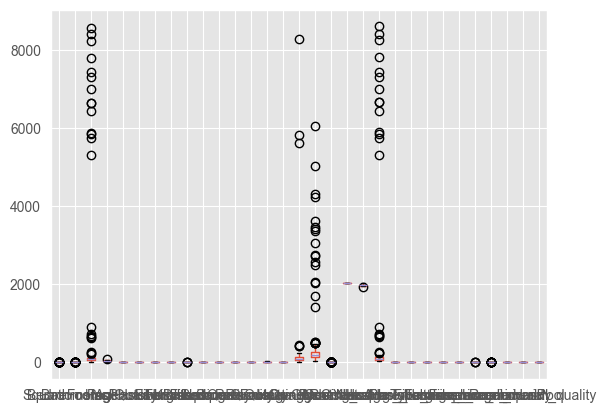

In [22]:
df.boxplot()

#### 1: Try to predict NA's based off location

##### Difficulty: how to treat extreme values
-> for training the model, values below 3 SD are not included

In [23]:
# Identify outliers for Price and Squarefootage

# Calculate mean and standard deviation
price_mean = df['Price'].mean()
price_std = df['Price'].std()
square_feet_mean = df['SquareFootageHouse'].mean()
square_feet_std = df['SquareFootageHouse'].std()

# Define bounds for being within 3 standard deviations
price_upper_bound = price_mean + 3 * price_std
price_lower_bound = price_mean - 3 * price_std
square_feet_upper_bound = square_feet_mean + 3 * square_feet_std
square_feet_lower_bound = square_feet_mean - 3 * square_feet_std

# Filter data for outliers
extreme_prices = df[(df['Price'] > price_upper_bound) | (df['Price'] < price_lower_bound)]
extreme_square_feet = df[(df['SquareFootageHouse'] > square_feet_upper_bound) | 
                           (df['SquareFootageHouse'] < square_feet_lower_bound)]

# Print results
print("Extreme Prices:\n", extreme_prices[['Price', 'SquareFootageHouse']])
print("Extreme Square Feet:\n", extreme_square_feet[['Price', 'SquareFootageHouse']])

df_filtered_price_sf = df[
    (df['Price'] >= price_lower_bound) & (df['Price'] <= price_upper_bound) &
    (df['SquareFootageHouse'] >= square_feet_lower_bound) & 
    (df['SquareFootageHouse'] <= square_feet_upper_bound)
]


Extreme Prices:
          Price  SquareFootageHouse
13   3456.1926                74.0
114  3064.1810                66.0
244  2506.0022               112.0
419  5041.2354               136.0
439  6050.5916                76.0
458  2578.1786                41.0
561  3620.8370               108.0
566  4229.2804                48.0
604  3419.3726                77.0
625  4311.0886                79.0
698  1688.5490               106.0
814  2749.9452                91.0
877  2733.1256                81.0
906  2045.7770                66.0
935  3353.4360                61.0
970  2032.4594                28.0
Extreme Square Feet:
          Price  SquareFootageHouse
14    51.50734              5871.0
94   118.74909              6653.0
183  528.42211              8578.0
209  191.94354              6641.0
272  177.42720              8403.0
287  301.07468              6997.0
469  113.91137              5842.0
482   90.84932              5747.0
515  133.81882              8223.0
555  166.75554  

In [24]:

#defining independent and dependent variables
X = df[['SquareFootageHouse', 'Price']]
y = df['Location']

# Encoding the categorical data
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
target_names = [str(name) for name in encoder.categories_[0]]  # Converting categories to strings immediately

# Splitting the dataset into training and testing sets: 20% for testing; 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert one-hot encoded y_train and y_test back to label encoded
y_train_label = np.argmax(y_train, axis=1)
y_test_label = np.argmax(y_test, axis=1)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train_label)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test_label, y_pred, target_names=target_names))

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

#### Conclusion for location:
The prediction of location was not satisfying. We should not try to replace NA's with predictions.

Na's will be replaced by Median values

In [25]:
float_columns = df.select_dtypes(include=['float64']).columns
df_float = df[float_columns]
df_median = df_float.fillna(df_float.median())

In [26]:
df = df_median.copy()

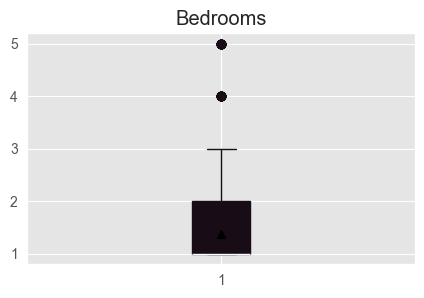

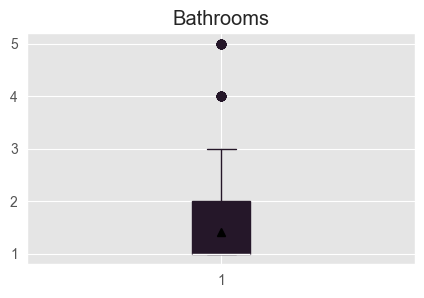

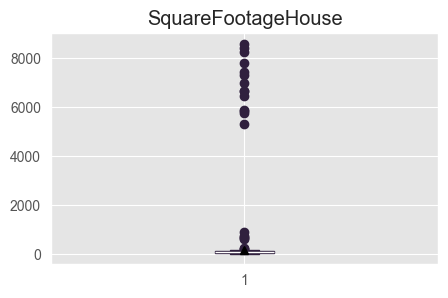

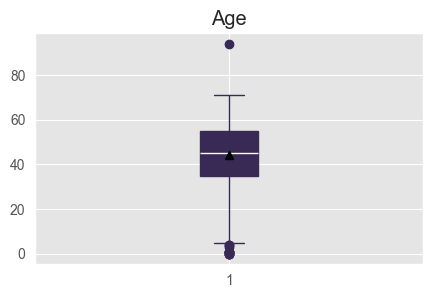

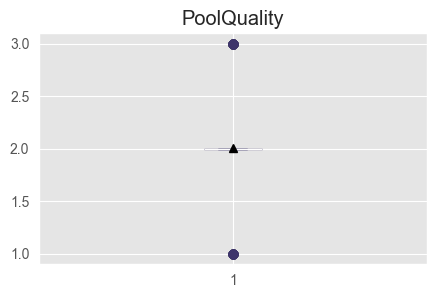

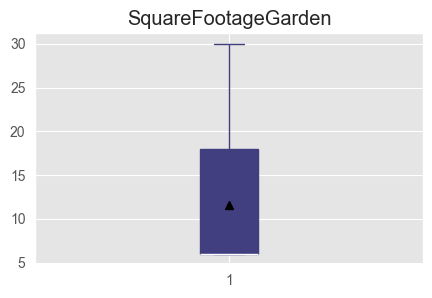

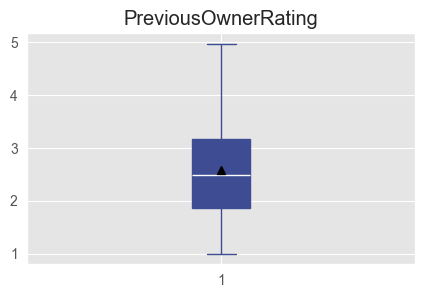

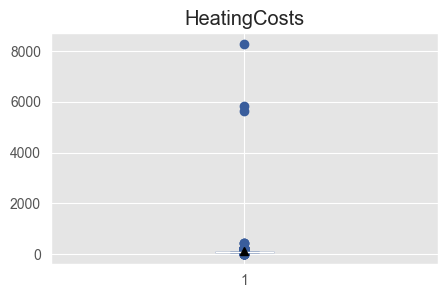

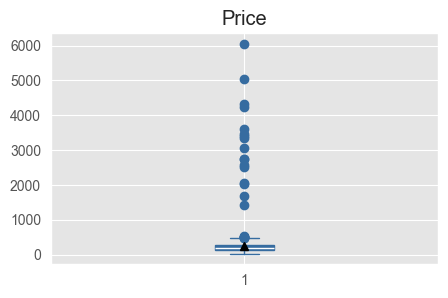

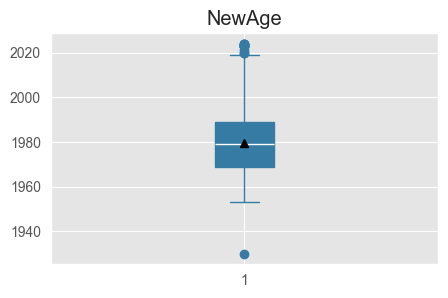

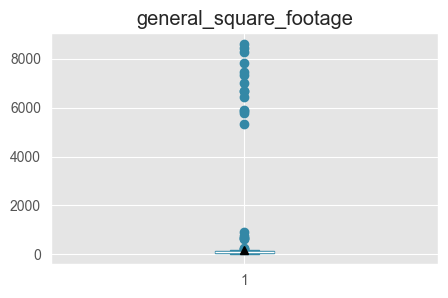

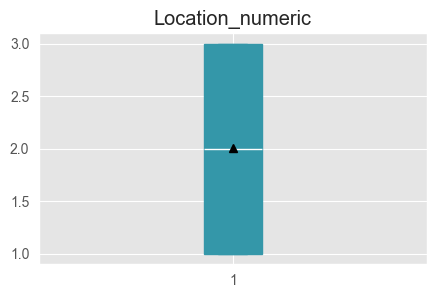

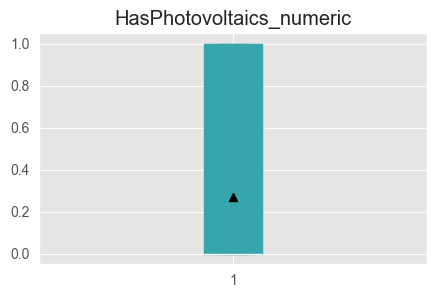

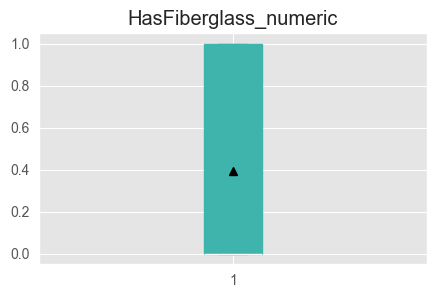

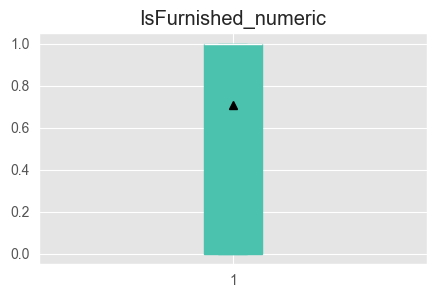

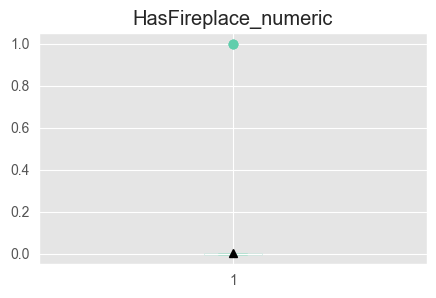

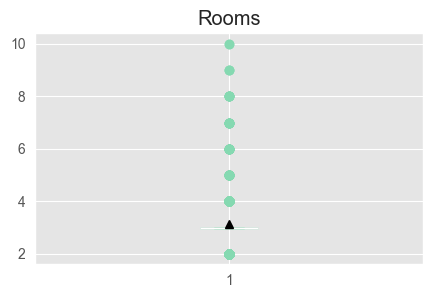

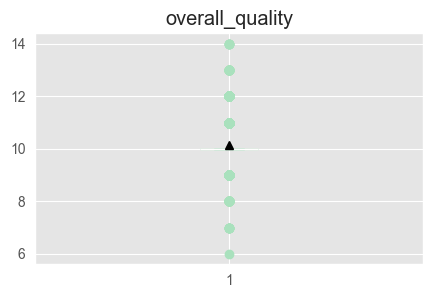

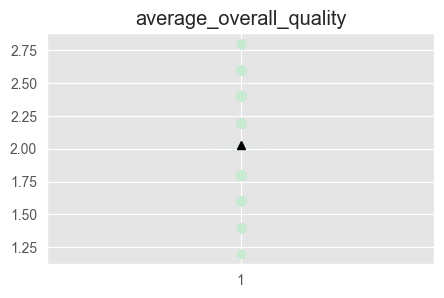

In [27]:
palette = sns.color_palette("mako", len(df.columns))

# Iterate over the selected columns and create box plots
for i, col in enumerate(df.columns):
    data = df[[col]]
    plt.figure(figsize=(5, 3))
    
    # Create a boxplot with the chosen color and showing the mean
    plt.boxplot(data, showmeans=True, patch_artist=True, 
                boxprops=dict(facecolor=palette[i % len(palette)], color=palette[i % len(palette)]),
                whiskerprops=dict(color=palette[i % len(palette)]),
                capprops=dict(color=palette[i % len(palette)]),
                flierprops=dict(markerfacecolor=palette[i % len(palette)], markeredgecolor=palette[i % len(palette)]),
                medianprops=dict(color='white'),
                meanprops=dict(markerfacecolor='black', markeredgecolor='black'))

    # Set the title for the plot
    plt.title(col)
    
    # Show the plot
    plt.show()

## 3:

## Feature selection with Random Forrest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
target_rfr = 'Price'
features_rfr = [col for col in df.columns if col != target_rfr]

In [30]:
x_rfr = df[features_rfr]
y_rfr = df[target_rfr]

In [31]:
x_train_rfr, x_test_rfr, y_train_rfr, y_test_rfr = train_test_split(x_rfr, y_rfr, test_size=0.2, random_state=42)

In [32]:
model_rfr = RandomForestRegressor()

model_rfr.fit(x_train_rfr, y_train_rfr)

importances = model_rfr.feature_importances_

importance_scores = pd.DataFrame({'Feature': features_rfr, 'Importance': importances})
importance_scores_sorted = importance_scores.sort_values(by='Importance', ascending=False)
importance_scores_sorted

,Feature,Importance
6,PreviousOwnerRating,0.231593
9,general_square_footage,0.121085
8,NewAge,0.120765
2,SquareFootageHouse,0.119007
3,Age,0.116432
7,HeatingCosts,0.094301
10,Location_numeric,0.043733
12,HasFiberglass_numeric,0.031200
1,Bathrooms,0.030828
0,Bedrooms,0.016940


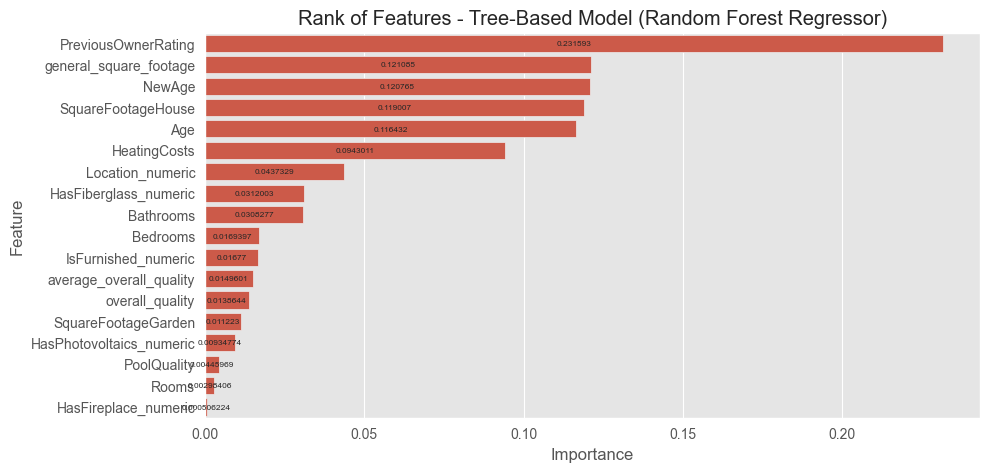

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Importance', y='Feature', data=importance_scores_sorted)
ax.bar_label(ax.containers[0], fontsize=6, label_type='center')
plt.title('Rank of Features - Tree-Based Model (Random Forest Regressor)')
plt.show()

## Different Model Testing

In [ ]:
features = [col for col in importance_scores_sorted['Feature'] if importance_scores_sorted['Importance'][importance_scores_sorted['Feature'] == col].values[0] > 0.01]

# drop features NewAge, overall_quality
features = [col for col in features if col not in ['NewAge', 'overall_quality', 'SquareFootageHouse', 'average_overall_quality']]

target = 'Price'

features

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df[features], np.log(df[target]), test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
model_lr = LinearRegression()

# Fit the model on the training data
model_lr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model_lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.44480846128965695
R-squared: 0.031781744969681114


In [41]:
y_test

925    5.321238
527    4.773846
570    4.834289
662    4.727613
638    5.378082
         ...   
488    5.453998
453    5.382881
65     5.392602
143    4.532793
690    4.725270
Name: Price, Length: 199, dtype: float64

In [42]:
# Get the coefficients and feature names
coefficients = model_lr.coef_
feature_names = X_train.columns

# Create a DataFrame to view the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


                  Feature  Coefficient
9     SquareFootageGarden     0.114996
7                Bedrooms     0.106510
8     IsFurnished_numeric     0.089730
6               Bathrooms     0.083047
3            HeatingCosts     0.033826
0     PreviousOwnerRating     0.016209
5   HasFiberglass_numeric     0.013582
2                     Age     0.006489
1  general_square_footage    -0.015139
4        Location_numeric    -0.097142


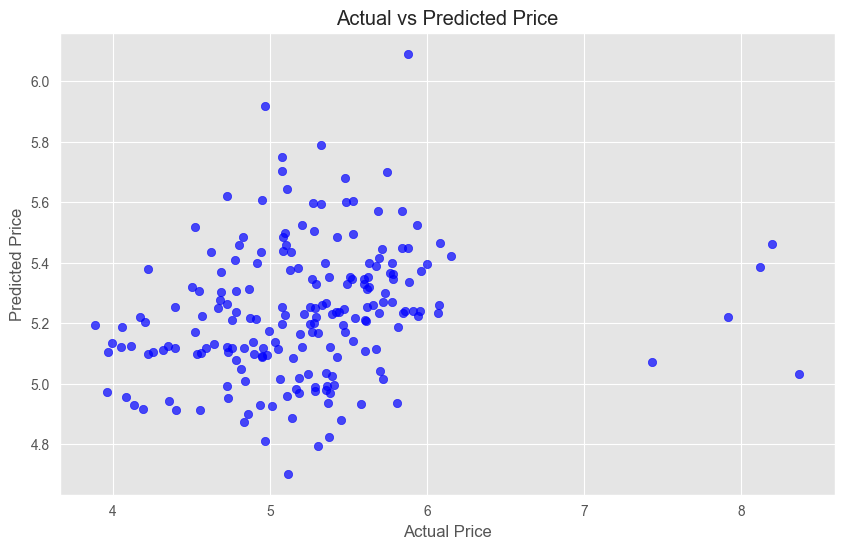

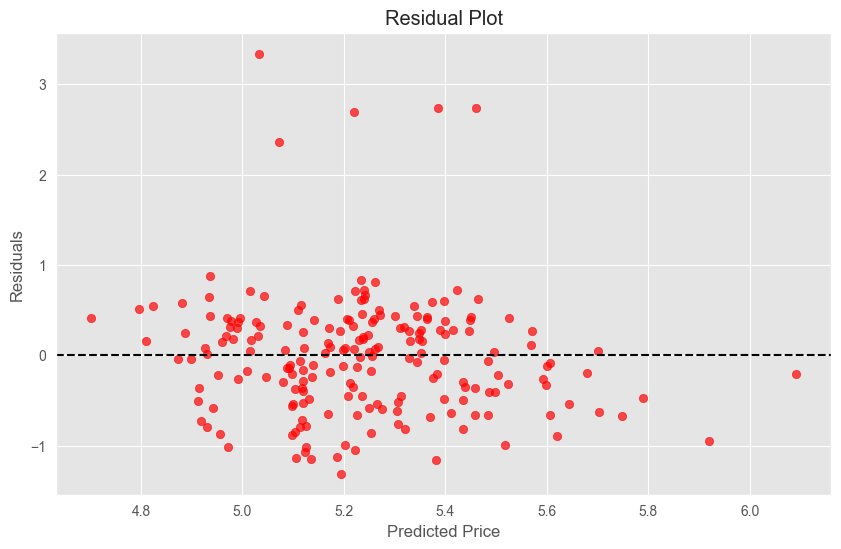

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # alpha helps to show overlapping data points
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='r')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[features]
y = df[target]

# Check VIF again
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print(f'Ridge Train MSE: {mse_train_ridge}, R2: {r2_train_ridge}')
print(f'Ridge Test MSE: {mse_test_ridge}, R2: {r2_test_ridge}')

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Tune alpha using cross-validation
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

print(f'Lasso Train MSE: {mse_train_lasso}, R2: {r2_train_lasso}')
print(f'Lasso Test MSE: {mse_test_lasso}, R2: {r2_test_lasso}')

print(f'Ridge Coefficients: {ridge.coef_}')
print(f'Lasso Coefficients: {lasso.coef_}')

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

# Define the feature matrix (X) and the target vector (y)
X = df[features]
y = np.log(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Engineering with scaling and polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler.fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Step 2: Hyperparameter Tuning with GridSearchCV for Random Forest and Gradient Boosting
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_rf.fit(X_train_scaled, y_train)
grid_gbr.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
best_gbr = grid_gbr.best_estimator_

# Step 3: Cross-Validation
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gbr = cross_val_score(best_gbr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Best Random Forest Params: {grid_rf.best_params_}')
print(f'Best Gradient Boosting Params: {grid_gbr.best_params_}')

print(f'Random Forest CV Mean Squared Error: {-np.mean(cv_scores_rf)}')
print(f'Gradient Boosting CV Mean Squared Error: {-np.mean(cv_scores_gbr)}')

# Evaluate the models on the test set
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_gbr = best_gbr.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f'Random Forest Test Mean Squared Error: {mse_rf}')
print(f'Gradient Boosting Test Mean Squared Error: {mse_gbr}')


Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Gradient Boosting Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Random Forest CV Mean Squared Error: 0.28755961415341147
Gradient Boosting CV Mean Squared Error: 0.28151417300446757
Random Forest Test Mean Squared Error: 0.35072775092573283
Gradient Boosting Test Mean Squared Error: 0.36485356328809676


In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Feature importance from the best random forest model
# feature_importances = best_rf.feature_importances_
# print(feature_importances)
# disp_features = features
# importance_df = pd.DataFrame({'Feature': disp_features, 'Importance': feature_importances})
# 
# # Sort and plot the feature importances
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=importance_df)
# plt.title('Feature Importance from Random Forest')
# plt.show()


[4.36045168e-03 1.21003302e-02 3.06095296e-03 3.72457794e-03
 5.17187406e-02 1.82571994e-05 1.16256351e-04 1.28842914e-04
 4.34243851e-05 1.66872333e-04 3.88096950e-03 2.64055133e-02
 3.92222985e-02 2.11028126e-02 2.10502670e-02 1.54781654e-02
 2.08380955e-02 1.20344394e-02 1.07266657e-02 1.67557036e-02
 1.68354997e-02 1.55045146e-02 2.38713915e-01 9.64566179e-02
 3.71733417e-03 1.92631170e-02 1.10013176e-02 2.32175030e-02
 2.78442596e-02 2.54573192e-03 2.25780935e-02 2.24578607e-02
 1.45776905e-02 6.49860312e-03 6.05522783e-03 9.37882520e-03
 1.49619201e-02 3.20086272e-03 3.12513108e-02 1.89481963e-03
 9.15994929e-03 8.67715115e-03 1.61289696e-02 1.45832679e-02
 4.65656556e-02 6.74481629e-03 3.48001764e-03 4.96840274e-03
 8.94857187e-03 1.13122518e-02 3.90479516e-05 2.92054191e-04
 3.17053058e-03 1.01946137e-03 4.31164550e-04 4.21156093e-05
 6.98342745e-04 2.07690083e-03 1.85197199e-03 1.77440044e-05
 4.21601425e-04 6.94550652e-03 1.73442665e-04 1.16077347e-03
 2.01626288e-04]


ValueError: All arrays must be of the same length

In [47]:
from sklearn.ensemble import VotingRegressor

# Create an ensemble model
ensemble_model = VotingRegressor([('rf', best_rf), ('gbr', best_gbr)])
ensemble_model.fit(X_train_scaled, y_train)

# Cross-validation score
cv_scores_ensemble = cross_val_score(ensemble_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Ensemble Model CV Mean Squared Error: {-np.mean(cv_scores_ensemble)}')

# Test set evaluation
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print(f'Ensemble Model Test Mean Squared Error: {mse_ensemble}')


Ensemble Model CV Mean Squared Error: 0.2799959969023607
Ensemble Model Test Mean Squared Error: 0.351656123904083


In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_gbr = RandomizedSearchCV(gbr, param_distributions=param_grid_gbr, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search_rf.fit(X_train_scaled, y_train)
random_search_gbr.fit(X_train_scaled, y_train)

best_rf_random = random_search_rf.best_estimator_
best_gbr_random = random_search_gbr.best_estimator_

print(f'Best Random Forest Params (Random Search): {random_search_rf.best_params_}')
print(f'Best Gradient Boosting Params (Random Search): {random_search_gbr.best_params_}')


C:\Users\kbeni\Documents\GitHub\KDDM1\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kbeni\Documents\GitHub\KDDM1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kbeni\Documents\GitHub\KDDM1\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\kbeni\Documents\GitHub\KDDM1\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_p

Best Random Forest Params (Random Search): {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 10}
Best Gradient Boosting Params (Random Search): {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}


In [49]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f'Ridge Regression Test Mean Squared Error: {mse_ridge}')
print(f'Lasso Regression Test Mean Squared Error: {mse_lasso}')


Ridge Regression Test Mean Squared Error: 0.38840200927353763
Lasso Regression Test Mean Squared Error: 0.44959788249534616


In [50]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)

xgb.fit(X_train_scaled, y_train)
lgbm.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_lgbm = lgbm.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f'XGBoost Test Mean Squared Error: {mse_xgb}')
print(f'LightGBM Test Mean Squared Error: {mse_lgbm}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6462
[LightGBM] [Info] Number of data points in the train set: 796, number of used features: 65
[LightGBM] [Info] Start training from score 5.233160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# combine df[target] and df[features]
# pd.concat([df[target], df[features]], axis=1).to_csv("features.csv", index=False)

## Dimensionality Reduction with PCA

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_rfr)

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df

In [ ]:
pca = PCA()
pca.fit(scaled_data)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_expl_var = np.cumsum(explained_variance)
print(f"Explained Variance: {explained_variance}")
print(f"Cumulative: {cumulative_expl_var}")

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_expl_var)+1), cumulative_expl_var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
num_components = np.argmax(cumulative_expl_var >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

In [ ]:
pca = PCA(n_components=num_components)
pca.fit_transform(scaled_data)

In [ ]:
loadings = pca.components_.T
loadings

In [ ]:
loadings_df = pd.DataFrame(loadings)
loadings_df.columns = [col for col in range(1,14)]
loadings_df

In [ ]:
loadings_df.insert(loc=0, column='Feature', value=features_rfr)
loadings_df

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scaled_data

In [ ]:
y_rfr

In [ ]:
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(scaled_data, y_rfr, test_size=0.2, random_state=42)

In [ ]:
x_train_rfc

In [ ]:
y_train_rfc

In [ ]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

randfo = RandomForestRegressor()
grid_search = GridSearchCV(estimator=randfo, param_grid=param_grid_rfc, cv=5) #, scoring='f1')
grid_search.fit(x_train_rfc, y_train_rfc)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
best_randfo = RandomForestRegressor(**best_params, random_state=42)
best_randfo.fit(x_train_rfc, y_train_rfc)

y_pred = best_randfo.predict(x_test_rfc)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test_rfc, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test_rfc, y_pred))
print("R² Score:", r2_score(y_test_rfc, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(best_randfo, scaled_data, y_rfr, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Errors: {cv_scores}")
print(f"Average Mean Squared Error: {cv_scores.mean()}")

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(best_randfo, scaled_data, y_rfr, cv=5, scoring=mse_scorer)
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average MSE: {cv_scores.mean()}")

## Convert to discrete values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train_rfc = le.fit_transform(y_train_rfc)

In [ ]:
df